In [1]:
import numpy
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

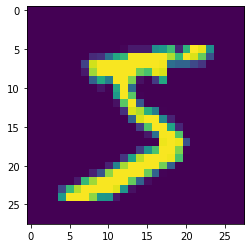

In [6]:
plt.imshow(X_train[0])

In [7]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [8]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [9]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

In [12]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 194s 103ms/step - loss: 0.2407 - accuracy: 0.9522 - val_loss: 0.0826 - val_accuracy: 0.9754
Epoch 2/5
1875/1875 [==============================] - 192s 103ms/step - loss: 0.0675 - accuracy: 0.9798 - val_loss: 0.0930 - val_accuracy: 0.9748
Epoch 3/5
1875/1875 [==============================] - 193s 103ms/step - loss: 0.0479 - accuracy: 0.9849 - val_loss: 0.0866 - val_accuracy: 0.9767
Epoch 4/5
1875/1875 [==============================] - 192s 102ms/step - loss: 0.0366 - accuracy: 0.9885 - val_loss: 0.0863 - val_accuracy: 0.9759
Epoch 5/5
1875/1875 [==============================] - 191s 102ms/step - loss: 0.0286 - accuracy: 0.9912 - val_loss: 0.1211 - val_accuracy: 0.9745


In [13]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.12110929191112518, 0.9745000004768372]


In [14]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 156ms/step
[[8.37742690e-13 3.19170328e-19 3.91730641e-11 1.24358371e-10
  2.52602430e-16 1.62780123e-19 7.93032275e-23 1.00000000e+00
  3.03282009e-12 2.05701003e-13]
 [1.37322975e-09 2.05759562e-10 9.99848247e-01 5.69174885e-09
  7.06299778e-14 1.22279455e-14 1.51776665e-04 3.26236831e-16
  8.11269185e-09 1.23040615e-16]
 [5.05600406e-09 9.99992728e-01 6.03697913e-07 4.26520581e-13
  3.17356154e-07 1.48394914e-08 1.34548756e-07 7.25121699e-11
  6.15754834e-06 3.37772935e-11]
 [1.00000000e+00 1.11887017e-16 4.49953096e-11 4.30655903e-17
  2.56415958e-16 1.91995497e-15 1.15896834e-10 1.19764203e-12
  1.35789741e-10 2.07491979e-09]]


In [15]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
